# Лабораторная работа №4

 Текст программы: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm


# Replaces string class names with int values
def replace_classes(y):
    y[y == 'Iris-setosa'] = 0
    y[y == 'Iris-versicolor'] = 1
    y[y == 'Iris-virginica'] = 2
    return y.astype(int)


# Swaps columns
def swap(index1, index2, X):
    for x in X:
        x[index1], x[index2] = x[index2], x[index1]


def get_xx_yy(X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def test_kernel_functions(X, y):
    C = 1.0
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', C=C).fit(X, y)
    sigmoid_svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)

    xx, yy = get_xx_yy(X)

    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with rbf kernel',
              'SVC with sigmoid kernel']

    for i, clf in enumerate((svc, lin_svc, rbf_svc, sigmoid_svc)):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length ')
        plt.ylabel('Petal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
        pred = clf.predict(X)
        print('Accuracy for {}: {:.2%}'.format(titles[i], metrics.accuracy_score(y, pred)))
    plt.show()


def test_svc(X, y):
    rbf_svc_c1 = svm.SVC(kernel='rbf', C=1).fit(X, y)
    rbf_svc_c100 = svm.SVC(kernel='rbf', C=100).fit(X, y)
    rbf_svc_c10000 = svm.SVC(kernel='rbf', C=10000).fit(X, y)
    rbf_svc_c100000 = svm.SVC(kernel='rbf', C=100000).fit(X, y)

    xx, yy = get_xx_yy(X)

    titles = ['rbf C = 1',
              'rbf C = 100',
              'rbf C = 10000',
              'rbf C = 100000']

    for i, clf in enumerate((rbf_svc_c1, rbf_svc_c100, rbf_svc_c10000, rbf_svc_c100000)):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length ')
        plt.ylabel('Petal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
        pred = clf.predict(X)
        print('Accuracy for {}: {:.2%}'.format(titles[i], metrics.accuracy_score(y, pred)))

    plt.show()


def test_gamma(X, y):
    rbf_svc_g01 = svm.SVC(kernel='rbf', gamma=0.1).fit(X, y)
    rbf_svc_g10 = svm.SVC(kernel='rbf', gamma=10).fit(X, y)
    rbf_svc_g100 = svm.SVC(kernel='rbf', gamma=100).fit(X, y)
    rbf_svc_g1000 = svm.SVC(kernel='rbf', gamma=1000).fit(X, y)

    xx, yy = get_xx_yy(X)

    titles = ['rbf gamma = 0.1',
              'rbf gamma = 10',
              'rbf gamma = 100',
              'rbf gamma = 1000']

    for i, clf in enumerate((rbf_svc_g01, rbf_svc_g10, rbf_svc_g100, rbf_svc_g1000)):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Petal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
        pred = clf.predict(X)
        print('Accuracy for {}: {:.2%}'.format(titles[i], metrics.accuracy_score(y, pred)))

    plt.show()


dataset = pd.read_csv('D:\Projects\Private\itmo-ml\data\iris.csv').values
X = dataset[:, 0:-1]
swap(1, 3, X)
X = X[:, :2]
y = dataset[:, -1]
y = replace_classes(y)

Выясним, какая функция ядра обеспечивает налучшую точность классификации, при этом зафиксируем параметр C:

Accuracy for SVC with linear kernel: 96.00%
Accuracy for LinearSVC (linear kernel): 92.00%
Accuracy for SVC with rbf kernel: 96.67%


Accuracy for SVC with sigmoid kernel: 33.33%


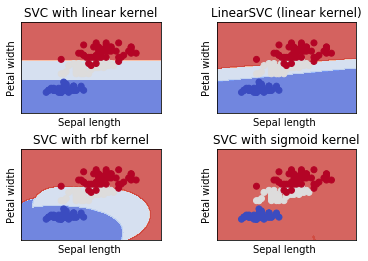

In [2]:
test_kernel_functions(X, y)

Наилучший результат показал SVC with rbf.

Подберем оптимальную величину C для улучшения точности классификации:

Accuracy for rbf C = 1: 96.67%
Accuracy for rbf C = 100: 96.67%
Accuracy for rbf C = 10000: 97.33%


Accuracy for rbf C = 100000: 97.33%


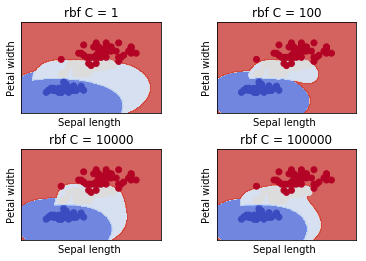

In [6]:
test_svc(X, y)

В целом, с увеличением параметра С растет и точность классификации.

Проверим, как влияет ширина ядра gamma на точность классификации:

Accuracy for rbf gamma = 0.1: 96.00%
Accuracy for rbf gamma = 10: 96.67%


Accuracy for rbf gamma = 100: 97.33%


Accuracy for rbf gamma = 1000: 97.33%


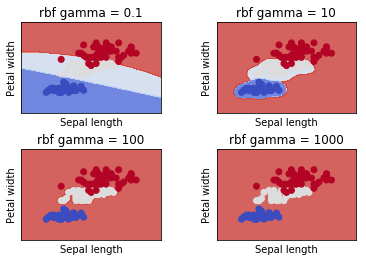

In [8]:
test_gamma(X, y)

В целом, при увличении параметра gamma точность классификации несколько увеличивается.

###Вывод
Для данного набора данных наиболее оптимальным будет использование SVC with rbf с шириной ядра gamma > 100.